# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Visualization Style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Define Functions

In [3]:
def load_dataset(csv_path):
    """Load dataset from a CSV file.""" 
    df = pd.read_csv(csv_path)
    print(f"Dataset loaded with {len(df)} entries.")
    return df

def compare_datasets_side_by_side(df_full, df_sample, img_dir_full, img_dir_sample):
    """Show dataset statistics side by side"""
    print("=" * 80)
    print(f"{'FULL DATASET':<40} {'10K SAMPLE DATASET':>40}")
    print("=" * 80)
    print(f"{'Total entries: ' + str(len(df_full)):<40} {'Total entries: ' + str(len(df_sample)):>40}")
    print(f"{'Unique genes: ' + str(df_full['gene'].nunique()):<40} {'Unique genes: ' + str(df_sample['gene'].nunique()):>40}")
    print(f"{'Age range: ' + str(df_full['age'].min()) + '-' + str(df_full['age'].max()):<40} {'Age range: ' + str(df_sample['age'].min()) + '-' + str(df_sample['age'].max()):>40}")
    print(f"{'Age mean: ' + str(round(df_full['age'].mean(), 2)):<40} {'Age mean: ' + str(round(df_sample['age'].mean(), 2)):>40}")
    print("=" * 80)

In [4]:
def check_data_quality(df, dataset_name="Dataset"):
    """Check for missing values in key columns"""
    print(f"\n{dataset_name} - Data Quality Check:")
    required_cols = ['gene', 'age', 'laterality', 'file_name']
    missing = df[required_cols].isnull().sum()
    
    if missing.sum() == 0:
        print("No missing values in key columns.")
    else:
        print("Missing values found:")
        print(missing[missing > 0])

def compare_data_quality(df_full, df_sample):
    """Compare data quality side by side"""
    print("=" * 80)
    print("DATA QUALITY COMPARISON")
    print("=" * 80)
    check_data_quality(df_full, "Full Dataset")
    check_data_quality(df_sample, "10K Sample Dataset")

In [5]:
def check_file_integrity(df, img_dir, dataset_name="Dataset"):
    """Check if image files exist in the input directory"""
    print(f"\n{dataset_name} - File Integrity Check:")
    missing_files = []
    for file_name in tqdm(df['file_name'], desc=f"Checking {dataset_name}"):
        if not os.path.exists(os.path.join(img_dir, file_name)):
            missing_files.append(file_name)
        
    if len(missing_files) == 0:
        print("All image files found")
    else:
        print(f"ERROR: {len(missing_files)} missing files")
        print(missing_files[:5])  # Show first 5 missing files

def compare_file_integrity(df_full, df_sample, img_dir_full, img_dir_sample):
    """Compare file integrity side by side"""
    print("=" * 80)
    print("FILE INTEGRITY COMPARISON")
    print("=" * 80)
    check_file_integrity(df_full, img_dir_full, "Full Dataset")
    check_file_integrity(df_sample, img_dir_sample, "10K Sample Dataset")

In [6]:
def plot_gene_distribution(df, ax=None, title="Gene Distribution"):
    """Plot the frequency of images per gene"""
    gene_counts = df['gene'].value_counts()
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 6))
    
    sns.barplot(x=gene_counts.index, y=gene_counts.values, palette="viridis", ax=ax)
    ax.set_title(f"{title}\nTotal unique genes: {len(gene_counts)}")
    ax.set_xlabel("Gene")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=90)
    
    if ax is None:
        plt.tight_layout()
        plt.show()

def compare_gene_distribution(df_full, df_sample):
    """Compare gene distribution side by side"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    
    plot_gene_distribution(df_full, ax=ax1, title="Full Dataset - Gene Distribution")
    plot_gene_distribution(df_sample, ax=ax2, title="10K Sample - Gene Distribution")
    
    plt.tight_layout()
    plt.show()

In [7]:
def plot_age_histogram(df, ax=None, title="Age Distribution"):
    """Plot a histogram of patient ages"""
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))
    
    sns.histplot(data=df, x='age', bins=30, kde=True, color='skyblue', ax=ax)
    ax.set_title(f"{title}\nMean: {df['age'].mean():.2f} | Median: {df['age'].median():.2f} | Range: {df['age'].min()}-{df['age'].max()}")
    ax.set_xlabel("Age")
    
    if ax is None:
        plt.tight_layout()
        plt.show()

def plot_age_boxplot(df, ax=None, title="Age by Gene"):
    """Plot boxplot of age by gene (top 20)"""
    top_genes = df['gene'].value_counts().head(20).index
    df_top = df[df['gene'].isin(top_genes)]
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 6))
    
    sns.boxplot(data=df_top, x='gene', y='age', order=top_genes, palette="coolwarm", ax=ax)
    ax.set_title(f"{title} (Top 20 Most Common)")
    ax.tick_params(axis='x', rotation=90)
    
    if ax is None:
        plt.tight_layout()
        plt.show()

def compare_age_distribution(df_full, df_sample):
    """Compare age distributions side by side"""
    # Histograms
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    plot_age_histogram(df_full, ax=ax1, title="Full Dataset - Age Distribution")
    plot_age_histogram(df_sample, ax=ax2, title="10K Sample - Age Distribution")
    plt.tight_layout()
    plt.show()
    
    # Boxplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    plot_age_boxplot(df_full, ax=ax1, title="Full Dataset - Age by Gene")
    plot_age_boxplot(df_sample, ax=ax2, title="10K Sample - Age by Gene")
    plt.tight_layout()
    plt.show()

In [8]:
def plot_laterality_pie(df, ax=None, title="Laterality Distribution"):
    """Plot the left/right eye distribution"""
    laterality_counts = df['laterality'].value_counts()
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))
    
    ax.pie(laterality_counts, labels=laterality_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
    ax.set_title(title)
    
    if ax is None:
        plt.tight_layout()
        plt.show()

def plot_laterality_by_gene(df, ax=None, title="Laterality by Gene"):
    """Plot laterality proportion by gene (top 20)"""
    top_genes = df['gene'].value_counts().head(20).index
    df_top = df[df['gene'].isin(top_genes)]
    
    lat_gene = pd.crosstab(df_top['gene'], df_top['laterality'], normalize='index')
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 6))
    
    lat_gene.plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm')
    ax.set_title(f"{title} (Top 20 Most Common)")
    ax.set_ylabel("Proportion")
    ax.axhline(0.5, color='black', linestyle='--', alpha=0.5)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.tick_params(axis='x', rotation=90)
    
    if ax is None:
        plt.tight_layout()
        plt.show()

def compare_laterality_distribution(df_full, df_sample):
    """Compare laterality distributions side by side"""
    # Print statistics
    print("=" * 80)
    print(f"{'FULL DATASET - Laterality':<40} {'10K SAMPLE - Laterality':>40}")
    print("=" * 80)
    lat_full = df_full['laterality'].value_counts()
    lat_sample = df_sample['laterality'].value_counts()
    for lat in lat_full.index:
        pct_full = (lat_full[lat] / len(df_full)) * 100
        pct_sample = (lat_sample.get(lat, 0) / len(df_sample)) * 100
        print(f"{lat + ': ' + str(lat_full[lat]) + f' ({pct_full:.1f}%)':<40} {lat + ': ' + str(lat_sample.get(lat, 0)) + f' ({pct_sample:.1f}%)':>40}")
    print("=" * 80)
    
    # Pie charts
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    plot_laterality_pie(df_full, ax=ax1, title="Full Dataset - Laterality Distribution")
    plot_laterality_pie(df_sample, ax=ax2, title="10K Sample - Laterality Distribution")
    plt.tight_layout()
    plt.show()
    
    # By gene stacked bar charts
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    plot_laterality_by_gene(df_full, ax=ax1, title="Full Dataset - Laterality by Gene")
    plot_laterality_by_gene(df_sample, ax=ax2, title="10K Sample - Laterality by Gene")
    plt.tight_layout()
    plt.show()

---
# Load Both Datasets

In [9]:
# File Paths for Full Dataset
CSV_PATH_FULL = "/mnt/data/ajohn/faf_flow_edit/data/images_256_cleaned/metadata_cleaned_256.csv"
IMG_DIR_FULL = "/mnt/data/ajohn/faf_flow_edit/data/images_256_cleaned/"

# File Paths for 10K Sample Dataset
CSV_PATH_SAMPLE = "/mnt/data/ajohn/faf_flow_edit/data/eval_10kSamples_256res/real_10kSamples_256res/metadata_cleaned_10kSamples_256.csv"
IMG_DIR_SAMPLE = "/mnt/data/ajohn/faf_flow_edit/data/eval_10kSamples_256res/real_10kSamples_256res/"

# Load both datasets
print("Loading Full Dataset...")
df_full = load_dataset(CSV_PATH_FULL)
print("\nLoading 10K Sample Dataset...")
df_sample = load_dataset(CSV_PATH_SAMPLE)

Loading Full Dataset...
Dataset loaded with 34082 entries.

Loading 10K Sample Dataset...
Dataset loaded with 10000 entries.


In [10]:
# Basic dataset comparison
compare_datasets_side_by_side(df_full, df_sample, IMG_DIR_FULL, IMG_DIR_SAMPLE)

FULL DATASET                                                   10K SAMPLE DATASET
Total entries: 34082                                         Total entries: 10000
Unique genes: 34                                                 Unique genes: 34
Age range: 8-95                                                   Age range: 8-95
Age mean: 42.32                                                   Age mean: 42.46


In [11]:
# Data quality comparison
compare_data_quality(df_full, df_sample)

DATA QUALITY COMPARISON

Full Dataset - Data Quality Check:
No missing values in key columns.

10K Sample Dataset - Data Quality Check:
No missing values in key columns.


In [12]:
# File integrity comparison
compare_file_integrity(df_full, df_sample, IMG_DIR_FULL, IMG_DIR_SAMPLE)

FILE INTEGRITY COMPARISON

Full Dataset - File Integrity Check:


Checking Full Dataset:   0%|          | 0/34082 [00:00<?, ?it/s]

Checking Full Dataset: 100%|██████████| 34082/34082 [00:00<00:00, 236833.00it/s]


All image files found

10K Sample Dataset - File Integrity Check:


Checking 10K Sample Dataset: 100%|██████████| 10000/10000 [00:00<00:00, 231130.61it/s]

All image files found


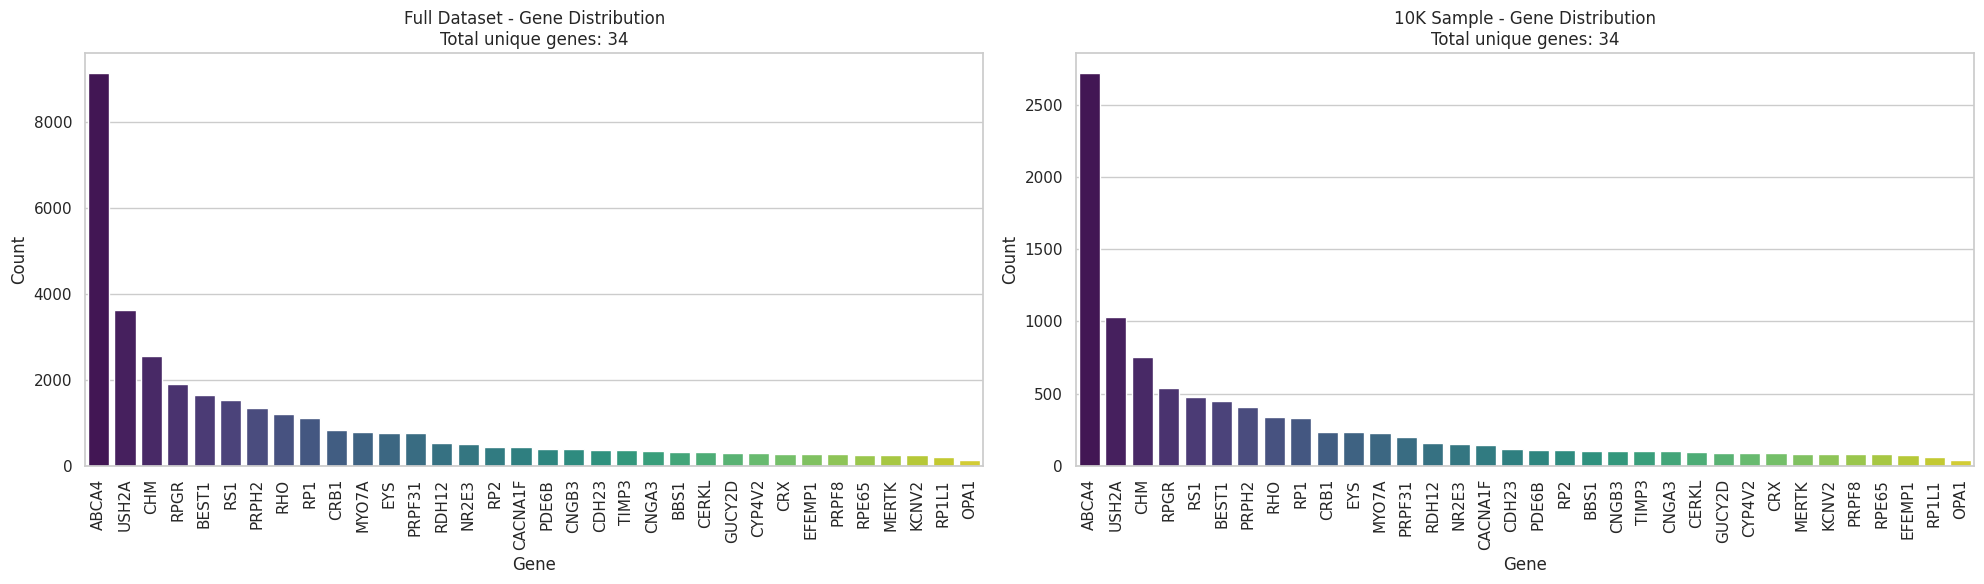

In [13]:
# Gene distribution comparison
compare_gene_distribution(df_full, df_sample)

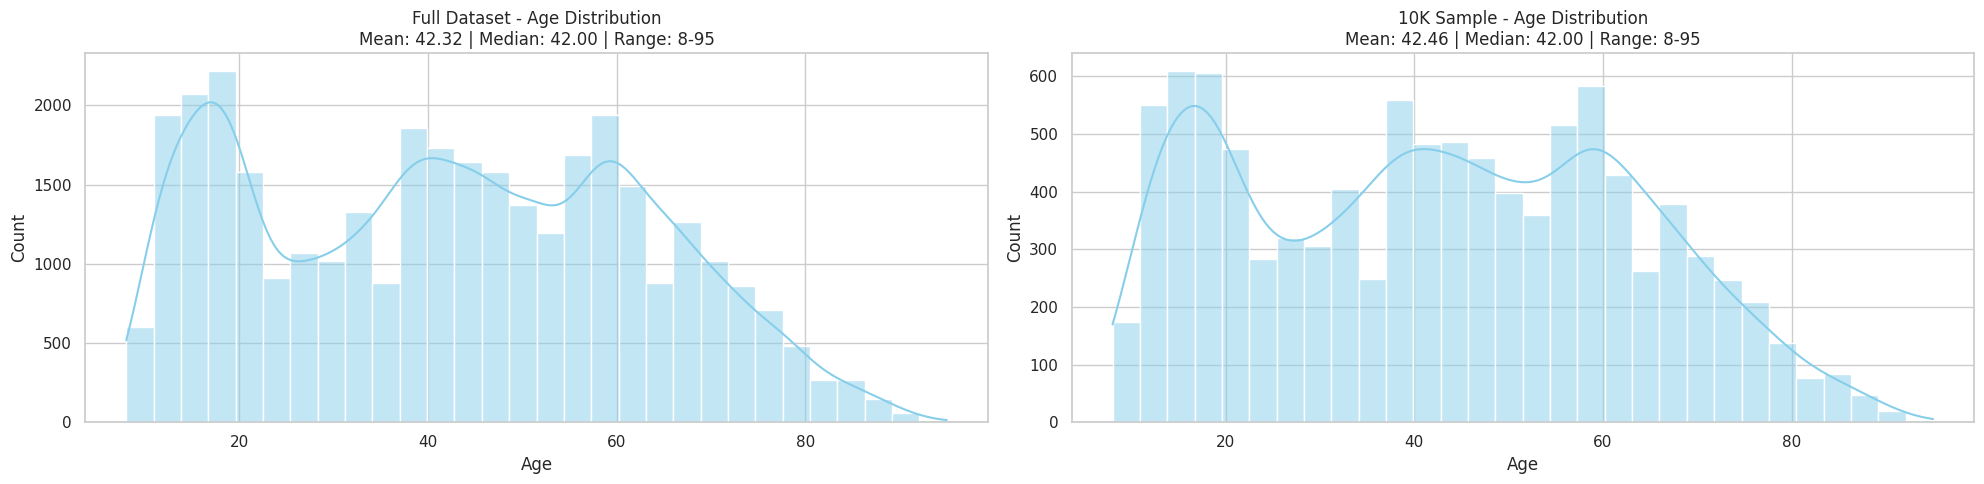

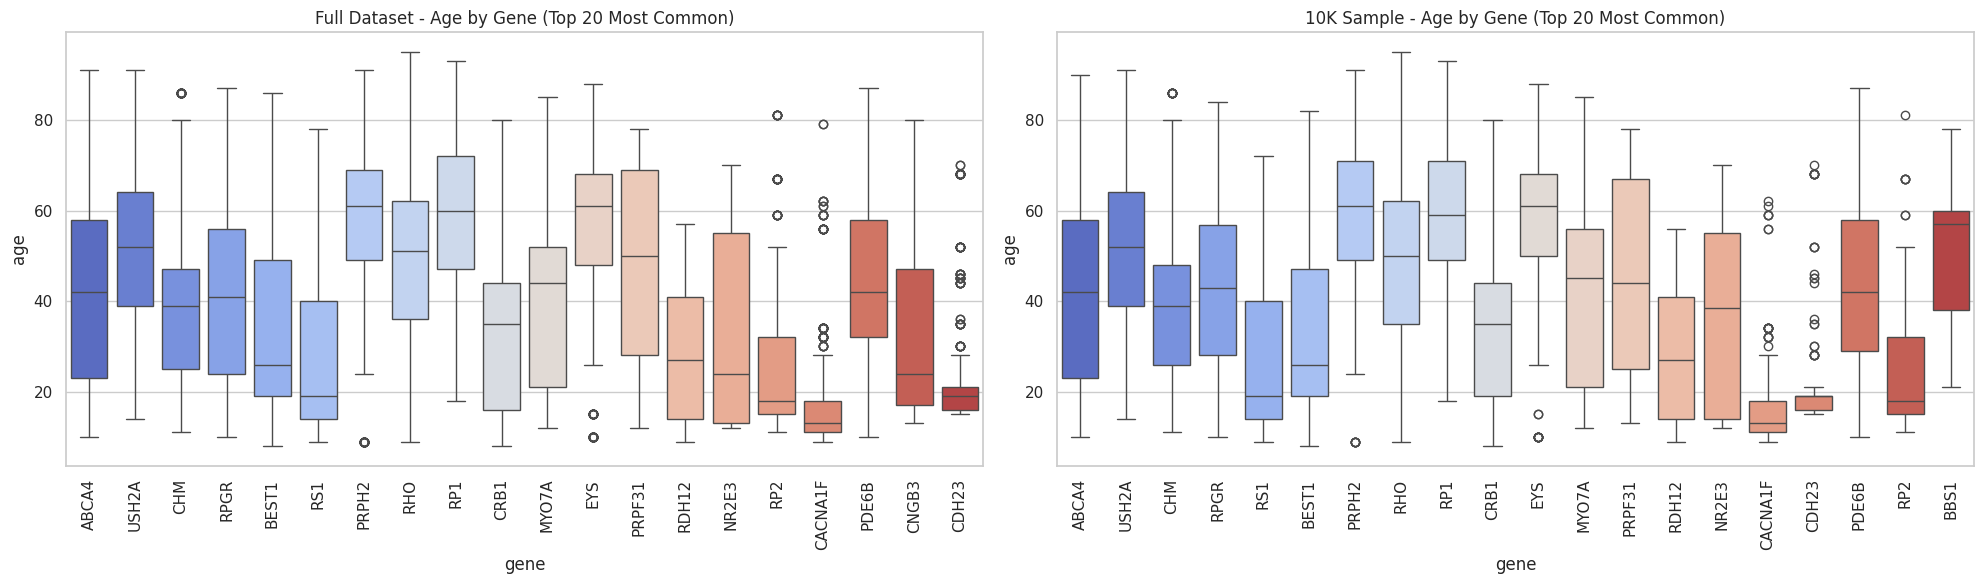

In [14]:
# Age distribution comparison
compare_age_distribution(df_full, df_sample)

FULL DATASET - Laterality                                 10K SAMPLE - Laterality
R: 17099 (50.2%)                                                  R: 5082 (50.8%)
L: 16983 (49.8%)                                                  L: 4918 (49.2%)


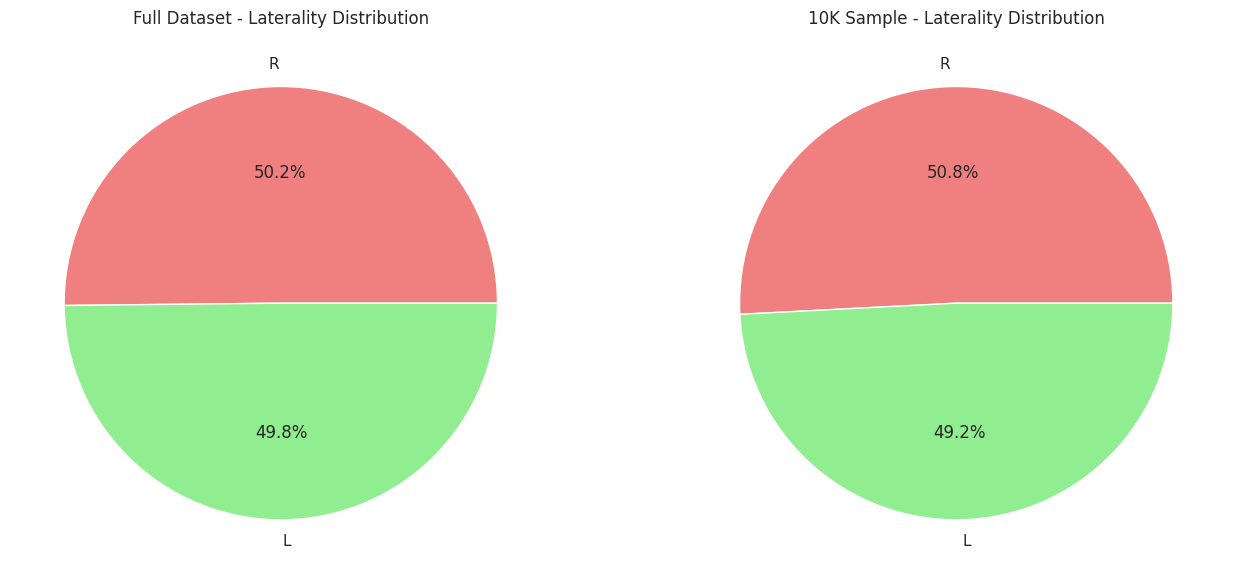

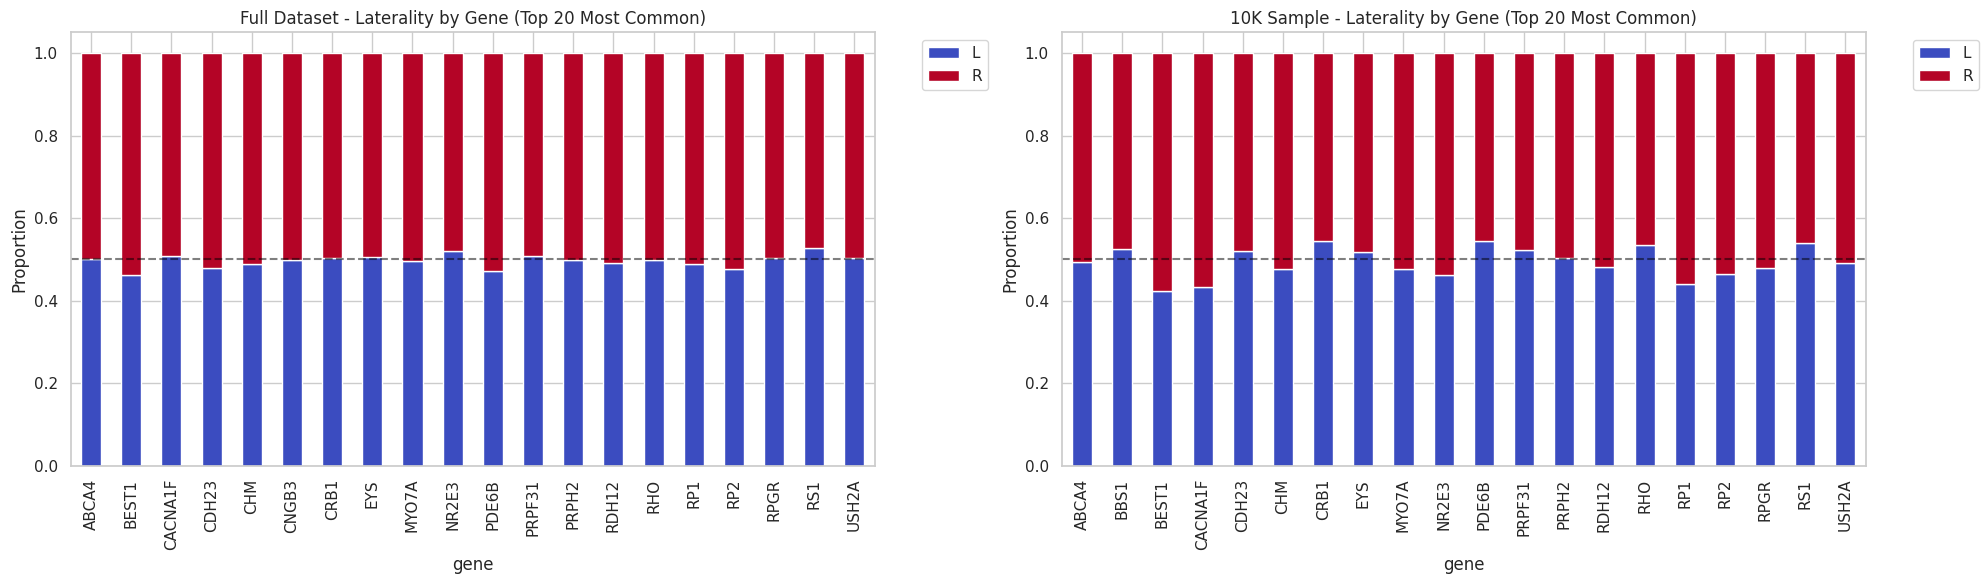

In [15]:
# Laterality distribution comparison
compare_laterality_distribution(df_full, df_sample)